In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
df = pd.read_csv('/Users/irene/Desktop/Курсовая/res_measures.csv',
                       sep=';', encoding='utf-8', names = 'h')
df2 = pd.read_csv('/Users/irene/Desktop/Курсовая/res_measures_simple.csv',
                       sep=';', encoding='utf-8', names = 'h')
df[['name', 'grade', 'av_depth', 'mean_l_sim', 'mean_p_sim', 'mean_l_sim_nei', 'mean_p_sim_nei',
'mean_length_s', 'mean_length_c', 'c_s', 'c_t',
'acl_t', 'acl_relcl_t', 'advcl_t', 'acl_cl', 'acl_relcl_cl', 'advcl_cl',
'coord_cl', 't_s', 'poss_s', 'prep_s', 'adj_n_s', 'ger_inf_s', 'part_n_s', 'n_inf_s',
'vp_s', 'mean_tokens_root', 'nan']] = df['h'].str.split('\t',expand=True)
df2[['name', 'grade', 'num_tokens', 'num_acl', 'num_acl_relcl', 'num_advcl',
'num_sents', 'num_cl', 'num_tu', 'num_ctu',
'num_coord', 'poss', 'prep_ph', 'adj_n', 'ger_inf',
'part_n', 'n_inf', 'num_vp',
'min_depth', 'max_depth', 'num_np', 'nan']] = df2['h'].str.split('\t',expand=True)
df = df.drop(['h','nan'], axis=1)
df2 = df2.drop(['h','nan', 'grade', 'name'], axis=1)
result = pd.concat([df, df2], axis=1)

In [3]:
result.head()

,name,grade,av_depth,mean_l_sim,mean_p_sim,mean_l_sim_nei,mean_p_sim_nei,mean_length_s,mean_length_c,c_s,...,poss,prep_ph,adj_n,ger_inf,part_n,n_inf,num_vp,min_depth,max_depth,num_np
0,AAl_13_1,best,4.27,32.36,26.07,31.4,25.2,24.64,11.783,2.091,...,21,33,3,6,3,1,19,2,8,66
1,AAl_27_1,best,5.0,23.96,19.56,25.33,20.89,20,14.286,1.4,...,25,44,2,6,0,0,12,3,10,77
2,AAl_30_1,best,3.85,20.36,16.58,17.83,13.83,16.69,11.421,1.462,...,13,37,3,11,1,1,23,2,5,65
3,ZEv_3_1,best,4.75,26.89,21.68,26.57,21.57,24,13.714,1.75,...,18,32,4,2,1,1,14,3,7,57
4,EEm_14_1,best,5.44,24.75,20.03,24.75,20.0,23.22,11.611,2.0,...,19,37,3,10,1,0,22,4,7,70


In [4]:
result.columns

Index(['name', 'grade', 'av_depth', 'mean_l_sim', 'mean_p_sim',
       'mean_l_sim_nei', 'mean_p_sim_nei', 'mean_length_s', 'mean_length_c',
       'c_s', 'c_t', 'acl_t', 'acl_relcl_t', 'advcl_t', 'acl_cl',
       'acl_relcl_cl', 'advcl_cl', 'coord_cl', 't_s', 'poss_s', 'prep_s',
       'adj_n_s', 'ger_inf_s', 'part_n_s', 'n_inf_s', 'vp_s',
       'mean_tokens_root', 'num_tokens', 'num_acl', 'num_acl_relcl',
       'num_advcl', 'num_sents', 'num_cl', 'num_tu', 'num_ctu', 'num_coord',
       'poss', 'prep_ph', 'adj_n', 'ger_inf', 'part_n', 'n_inf', 'num_vp',
       'min_depth', 'max_depth', 'num_np'],
      dtype='object')

In [99]:
norm_names = ['имя', 'оценка', 'средняя глубина дерева',
'расстояние Левенштейна между лемматизированными предложениями (каждое с каждым)',
'расстояние Левенштейна между предложениями с частеречной разметкой (каждое с каждым)',
'расстояние Левенштейна между лемматизированными предложениями (с соседними)',
'расстояние Левенштейна между предложениями с частеречной разметкой (с соседними)',
'средняя длина предложения', 'средняя длина клаузы', 'количество клауз на предложение',
'количество клауз на Т-юнит', 'количество клауз, модифицирующих именную группу, на Т-юнит',
'количество определительных клауз на Т-юнит',
'количество обстоятельственных клауз на Т-юнит',
'количество клауз, модифицирующих именную группу, на клаузу',
'количество определительных клауз на клаузу',
'количество обстоятельственных клауз на клаузу',
'количество сочинительных фраз на клаузу',
'количсетво Т-юнитов на предложение',
'количество посессивных конструкций на предложение',
'количество конструкций с предлогами на предложение',
'количество конструкций вида «прилагательное + существительное» на преложение',
'количество инфинитивов или герундиев в качестве объекта/субъекта на предложение',
'количество конструкций вида «причастие + существительное» на предложение',
'количество конструкций вида «существительное + инфинитив» на предложение',
'количество глагольных групп на предложение',
'среднее количество токенов до главного слова в предложении',
'количество токенов', 'количество клауз, модифицирующих именную группу',
'количество определительных клауз',
'количество обстоятельственных клауз',
'количество предложений', 'количество клауз', 'количество Т-юнитов', 'количество сложных Т-юнитов',
'количество сочинительных фраз',
'количество посессивных конструкций', 'количество конструкций с предлогами',
'количество конструкций вида «прилагательное + существительное»',
'количество инфинитивов или герундиев в качестве объекта/субъекта',
'количество конструкций вида «причастие + существительное»', 'количество конструкций вида «существительное + инфинитив»',
'количество глагольных групп',
'минимальная глубина дерева',
'максимальная глубина дерева',
'количество именных групп']

# 1 тип графиков

In [100]:
def first(name, values, index):
    x = list(range(1, len(values)+1))
    y = []
    for yy in values:
        y.append(float(yy))
    y = sorted(y)
    plt.plot(x, y, color='g')
    plt.xlabel('№')
    plt.ylabel('Value of {}'.format(str(name)))
    plt.title('Кривая эссе, упорядоченных по признаку "{}"'.format(str(norm_names[index])))
    plt.figtext(.2, .8, 'max value = {}'.format(str(max(y))))
    plt.figtext(.2, .75, 'min value = {}'.format(str(min(y))))
    plt.savefig('/Users/irene/Desktop/Курсовая/graphs/'+'descriptive_' + name+'_1.png')
    plt.show()

In [101]:
def second(result, values, grades, name, index):
    y = []
    for yy in values:
        y.append(float(yy))
    sns.set_style("whitegrid")
    sns.stripplot(x=grades, y=y, data=result)
    plt.title('Значения признака "{}" в трёх группах'.format(str(norm_names[index])))
    #plt.yticks([])
    plt.figtext(.3, .8, 'max value = {}'.format(str(max(y))))
    plt.figtext(.3, .75, 'min value = {}'.format(str(min(y))))
    #print(result[result['grade']=='best'][name].median())
    mean_best = mean(result[result['grade']=='best'][name].astype(float))
    mean_worst = mean(result[result['grade']=='worst'][name].astype(float))
    mean_aver = mean(result[result['grade']=='aver'][name].astype(float))
    plt.axhline(y=mean_best, color='blue', linestyle='-')
    plt.axhline(y=mean_aver, color='orange', linestyle='-')
    plt.axhline(y=mean_worst, color='green', linestyle='-')
    plt.savefig('/Users/irene/Desktop/Курсовая/graphs/'+'descriptive_' + name + '_2.png')
    plt.show()

In [102]:
from statistics import mean

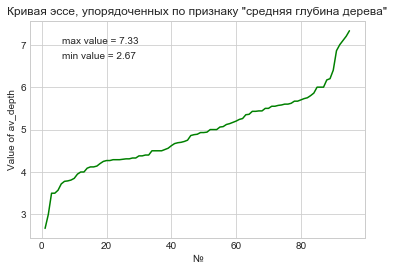

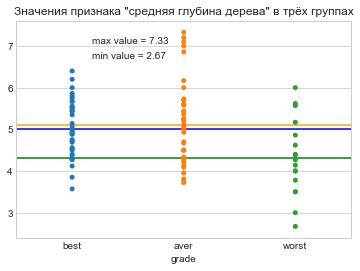

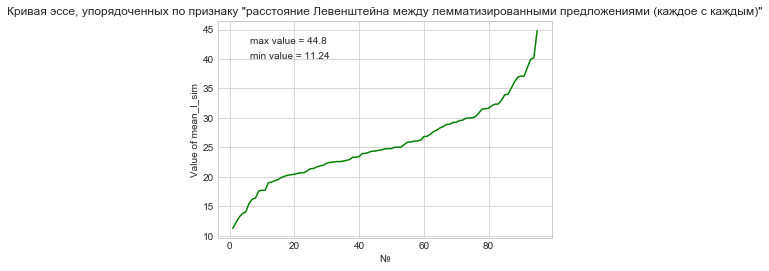

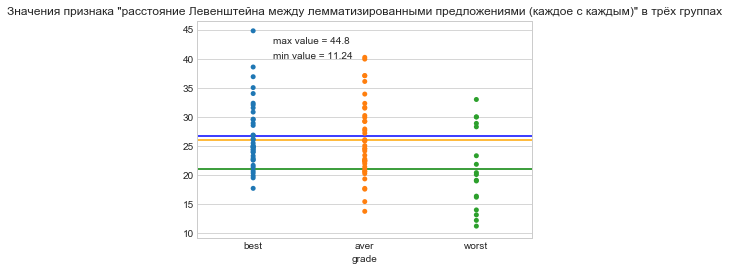

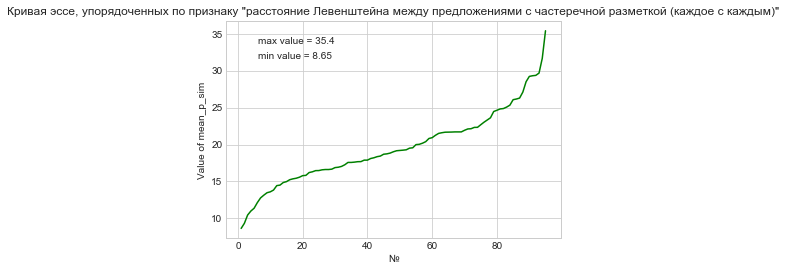

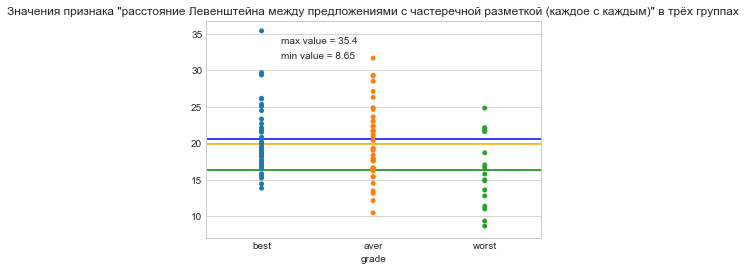

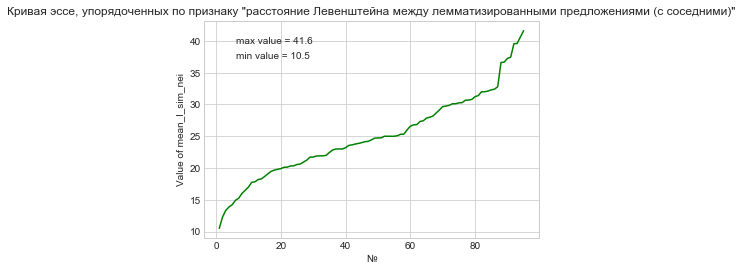

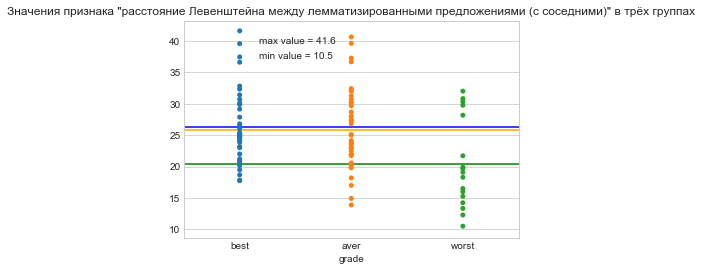

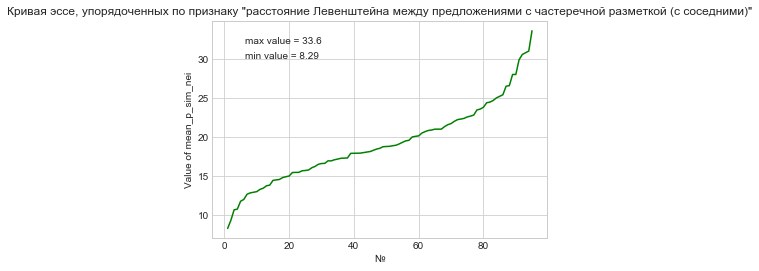

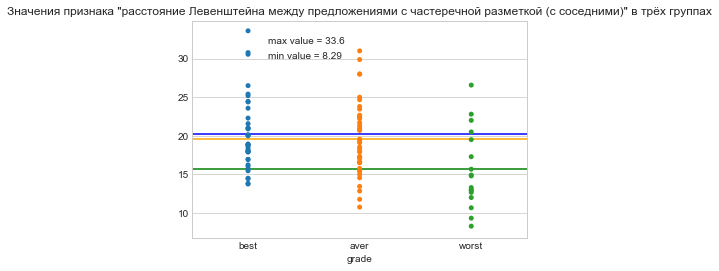

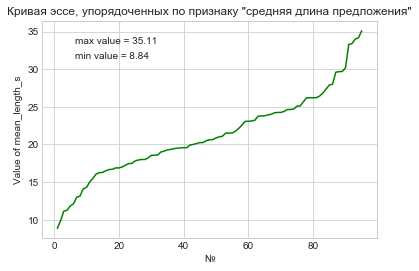

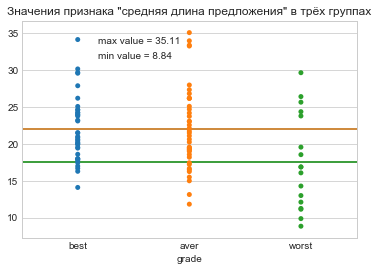

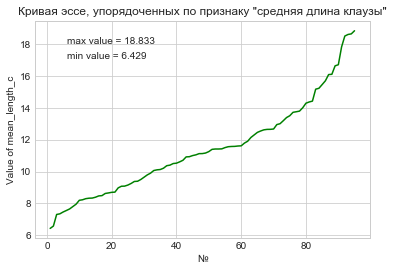

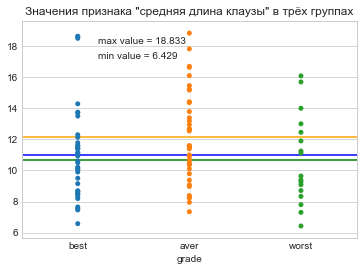

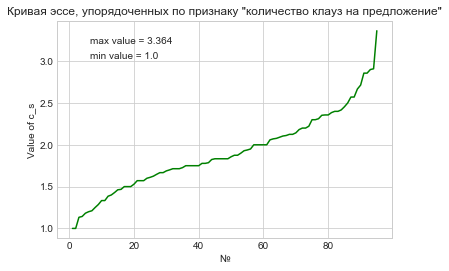

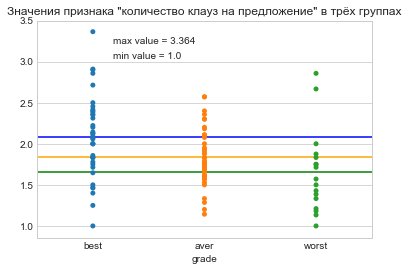

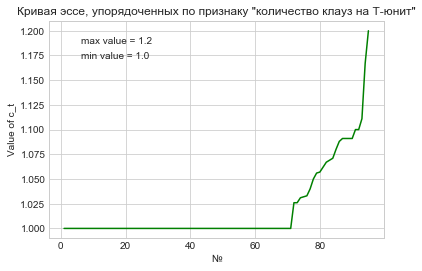

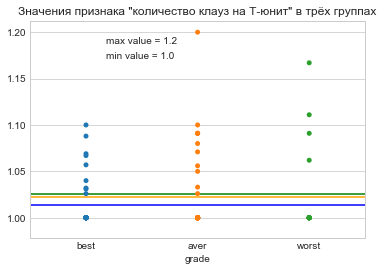

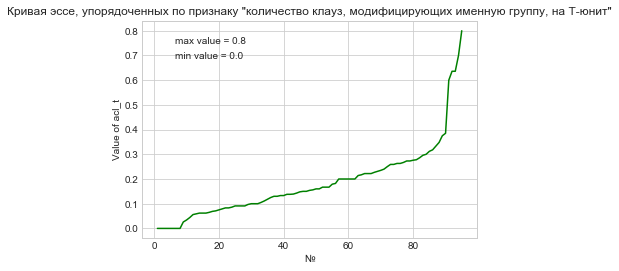

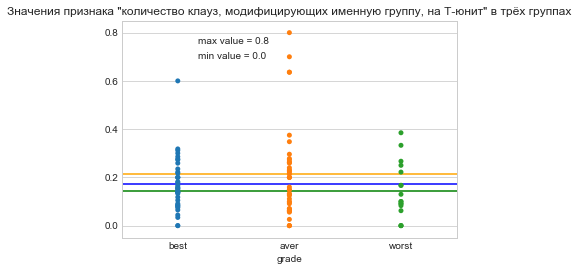

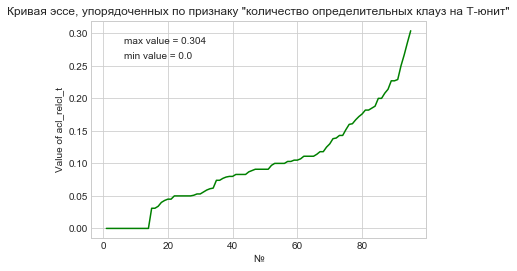

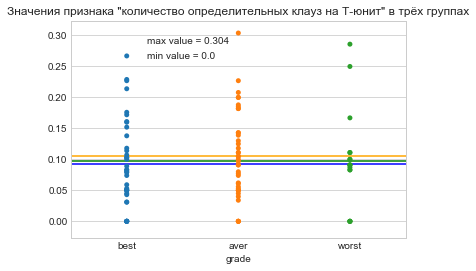

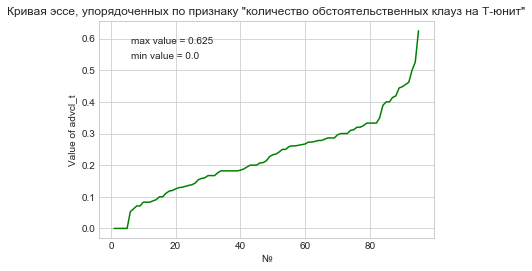

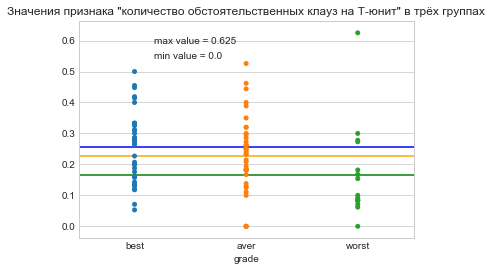

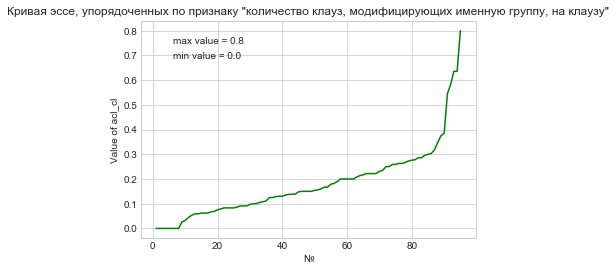

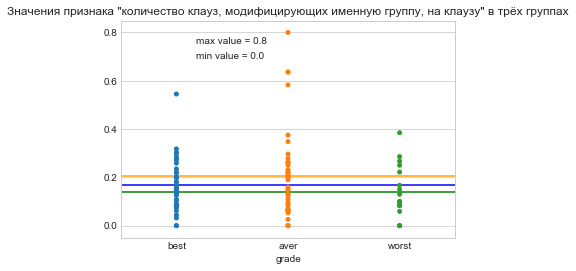

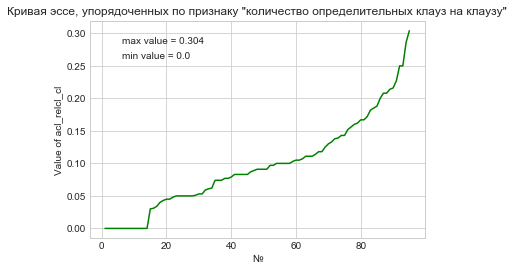

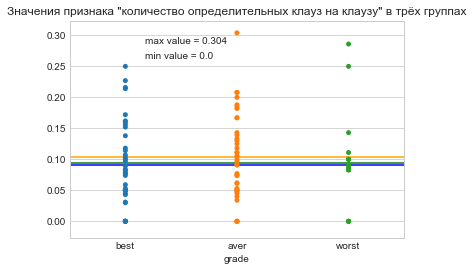

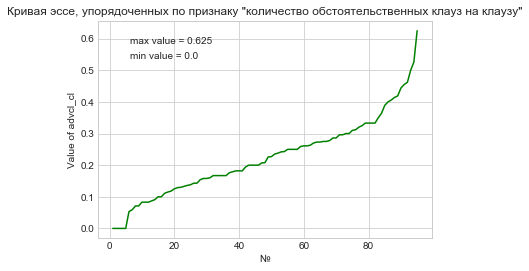

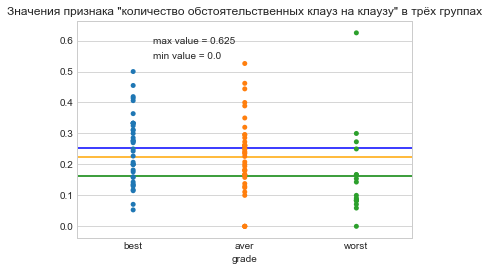

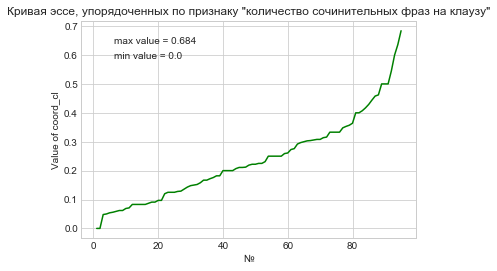

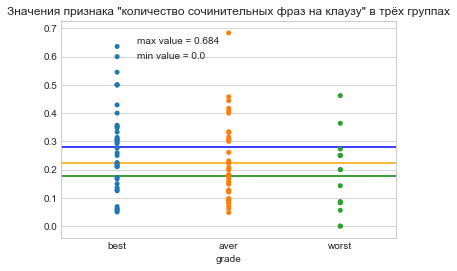

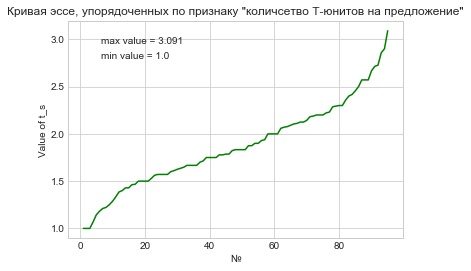

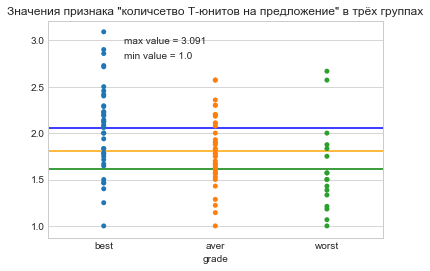

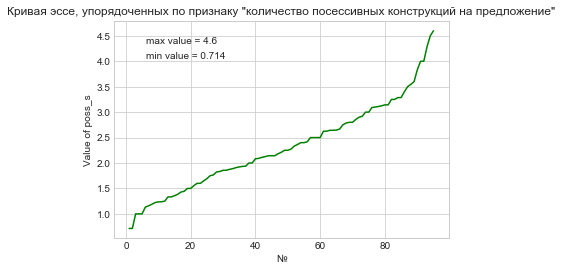

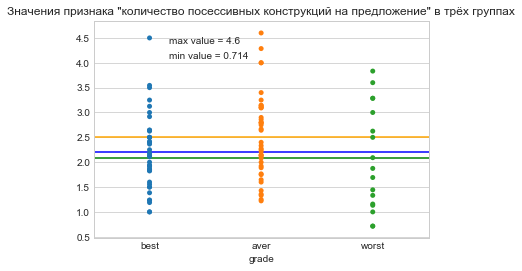

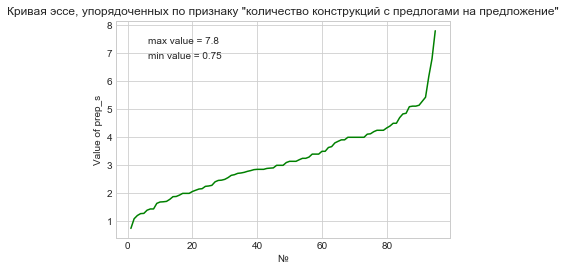

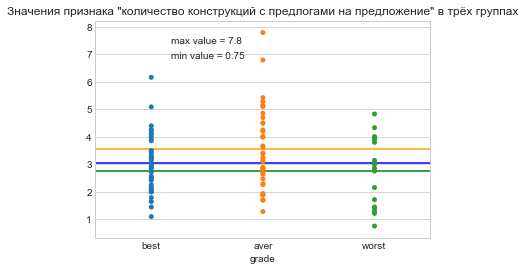

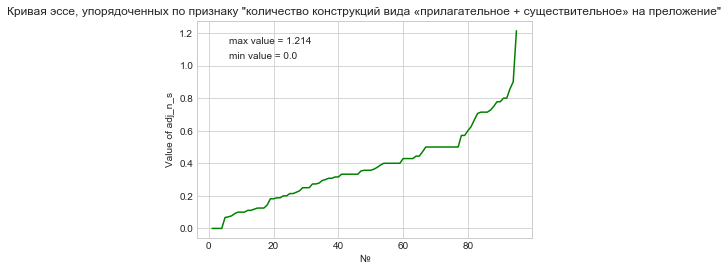

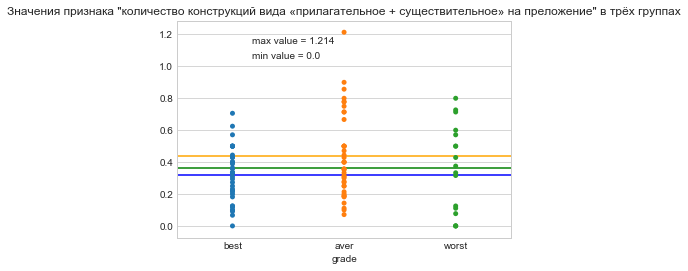

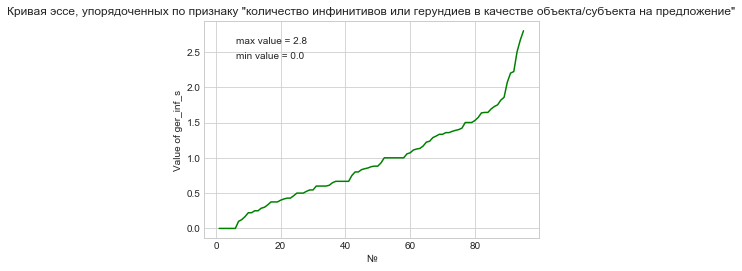

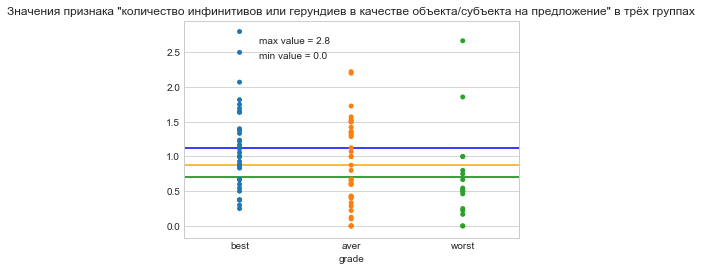

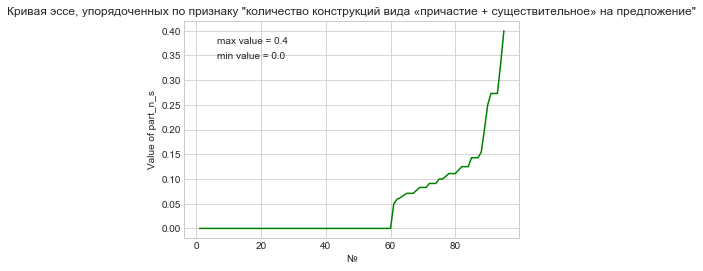

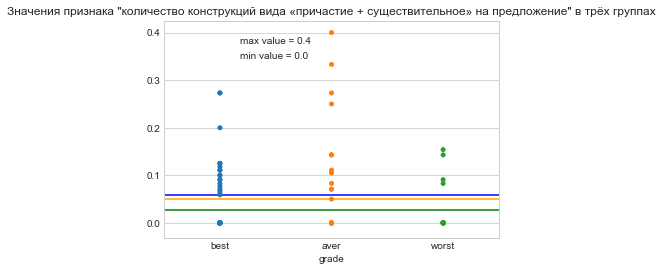

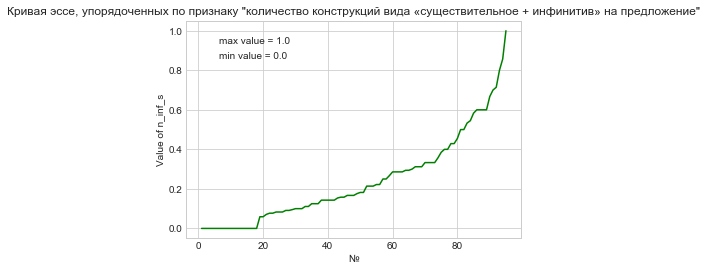

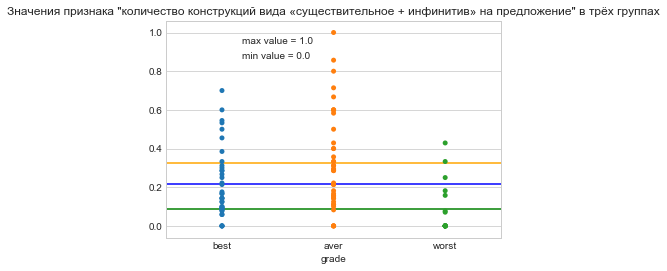

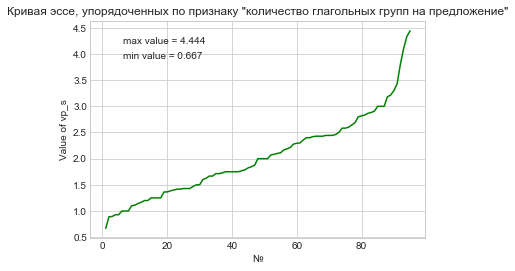

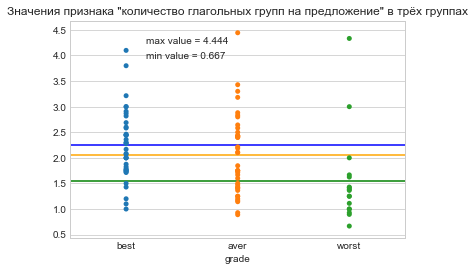

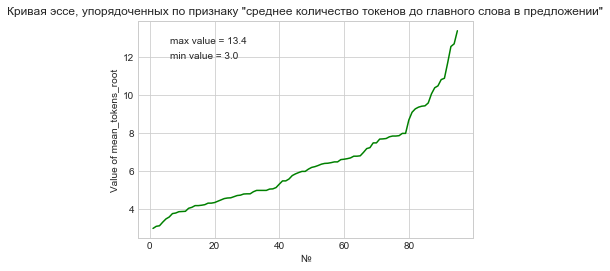

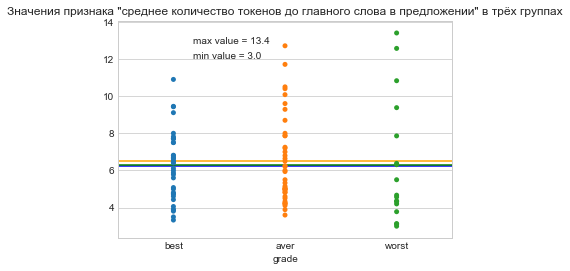

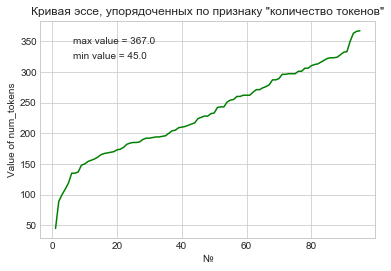

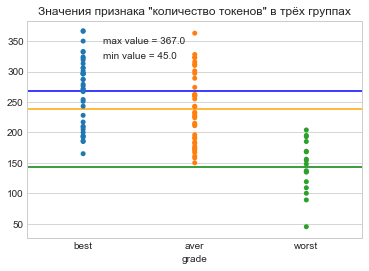

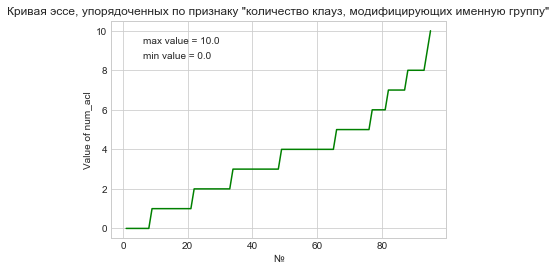

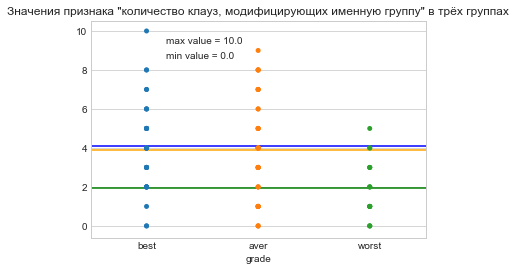

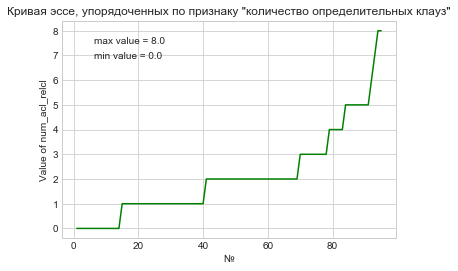

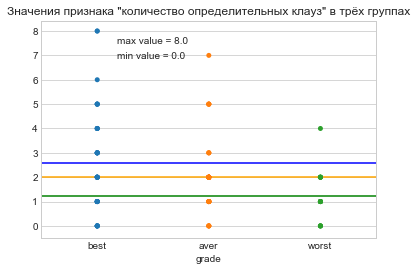

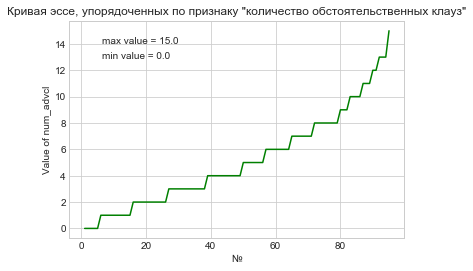

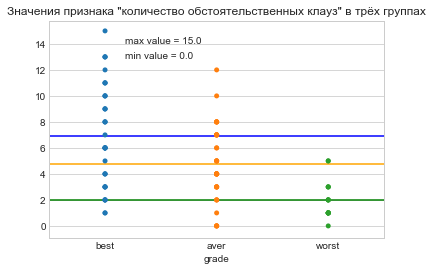

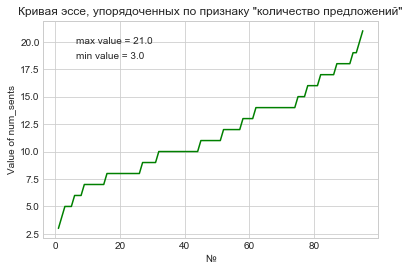

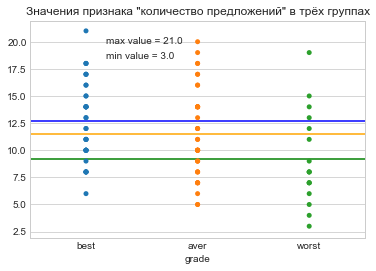

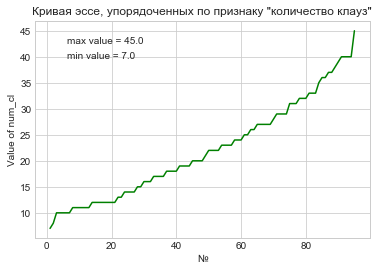

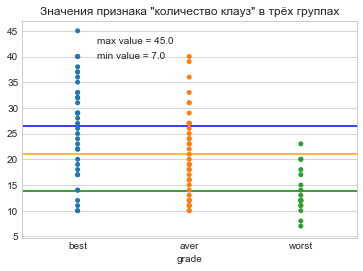

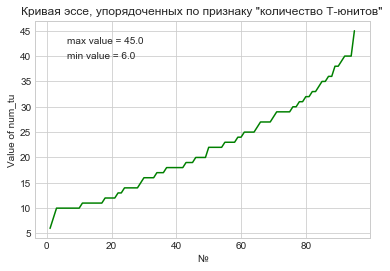

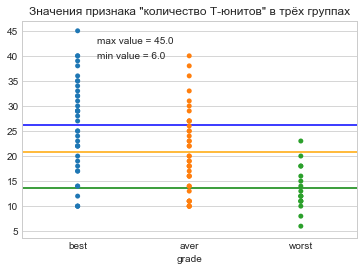

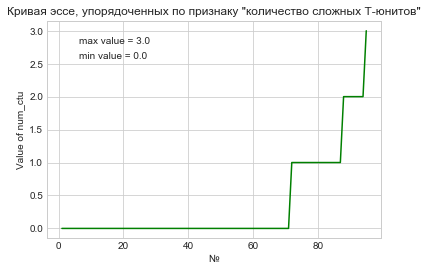

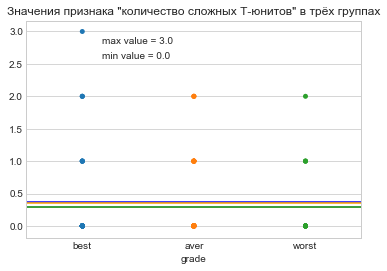

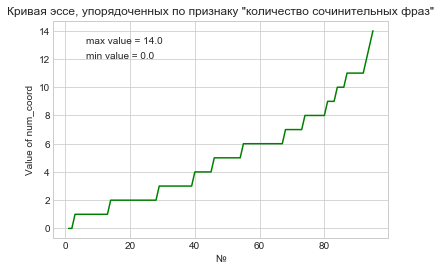

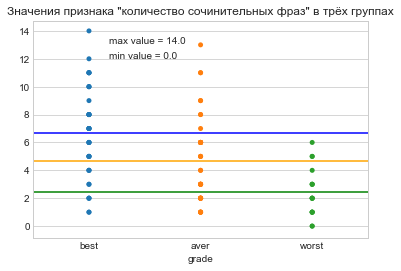

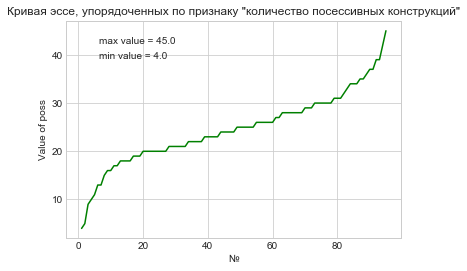

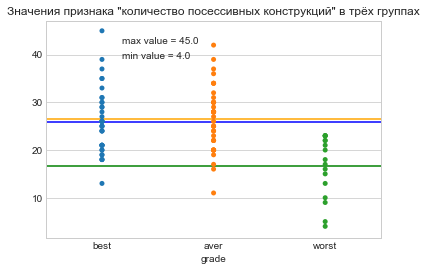

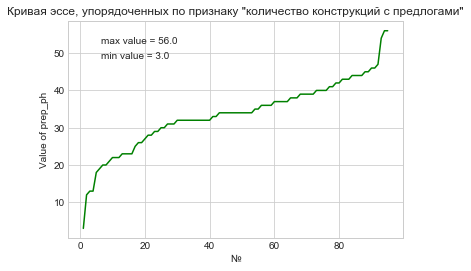

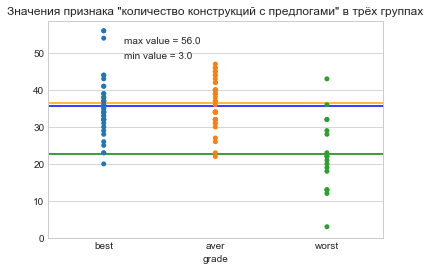

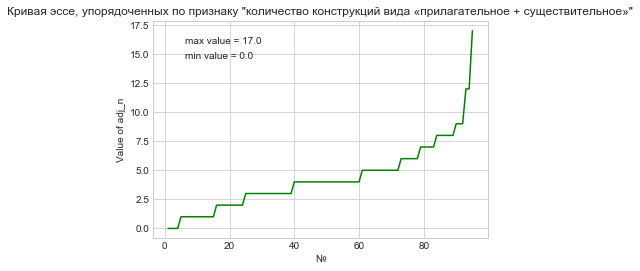

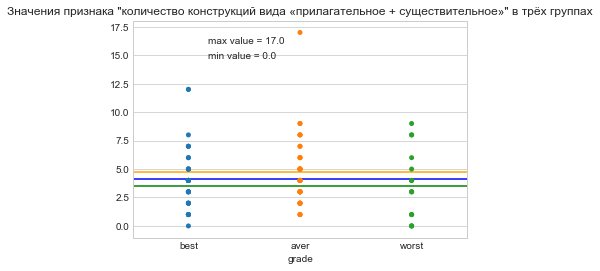

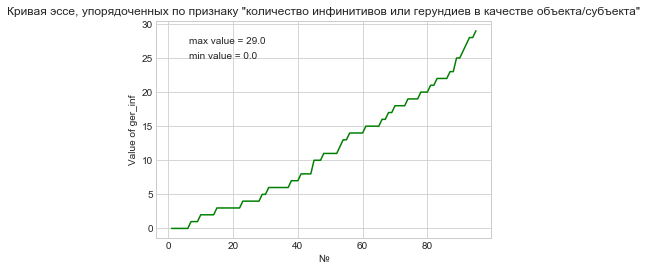

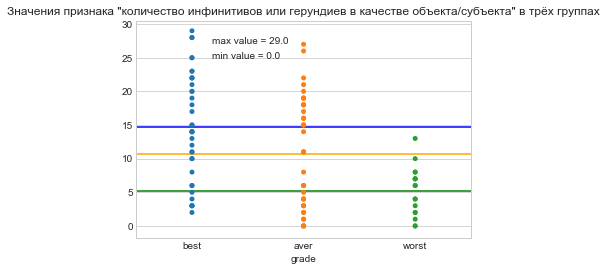

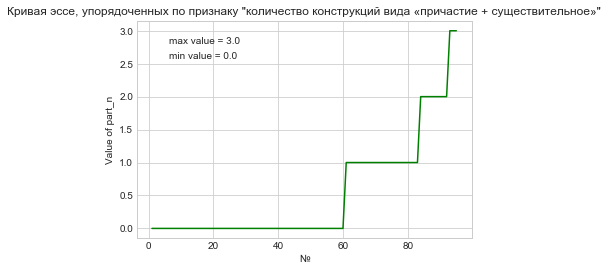

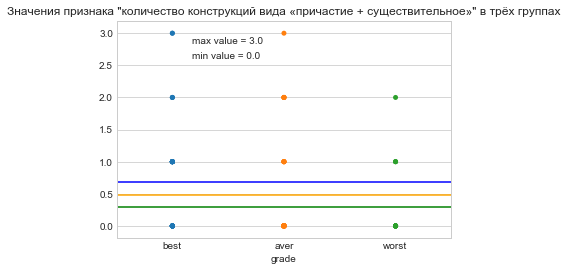

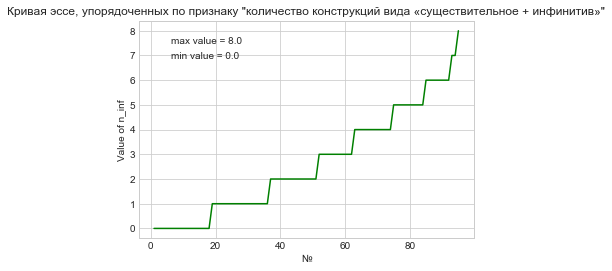

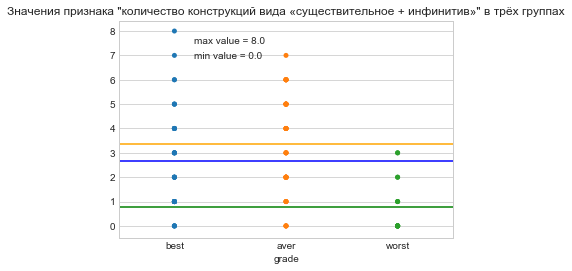

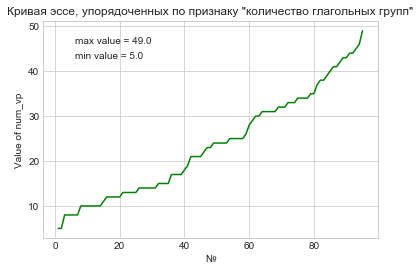

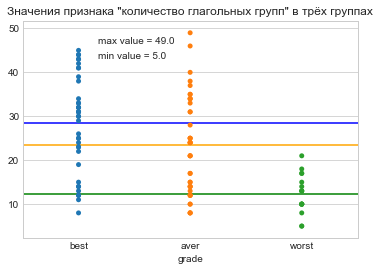

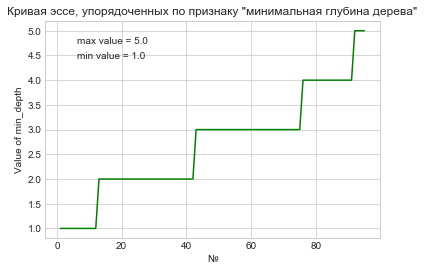

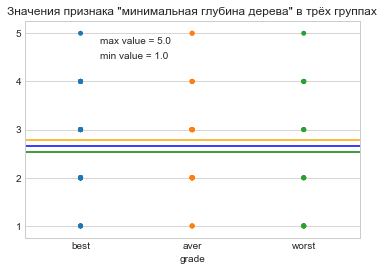

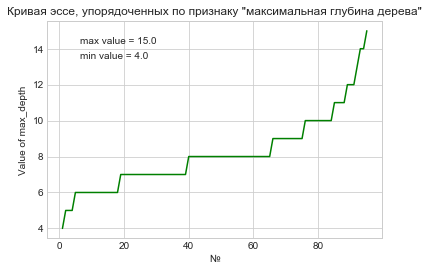

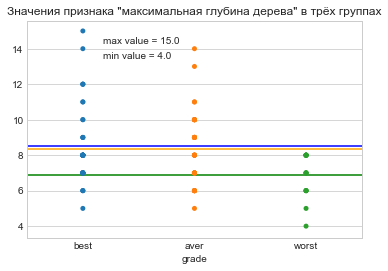

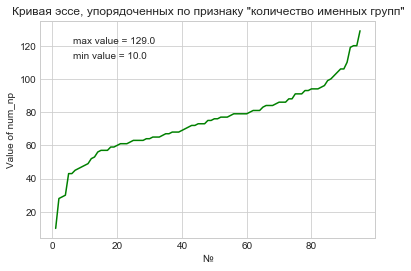

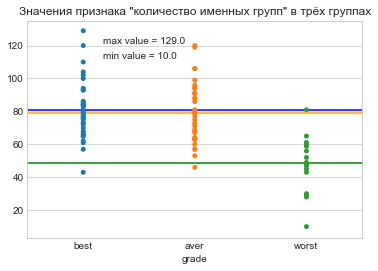

In [103]:
i = 2
for every_feature in result.columns[2:]:
    #print(i)
    #print(every_feature)
    first(every_feature, result[every_feature], i)
    second(result, result[every_feature], result['grade'], every_feature, i)
    i += 1